### 한국 Google Playstore 20일간 Crawling
#### : slide 10, 17, 25

In [2]:
import pandas as pd
import numpy as np
import os
from selenium import webdriver
from bs4 import BeautifulSoup
import urllib.request
import time
import re
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

#### : 크롤링 -  ID랑 비번 지우기!

### 한국 매출  랭킹

In [27]:
driver = webdriver.Chrome()
url = 'http://www.gevolution.co.kr/'
driver.get(url)

driver.find_element_by_xpath('//*[@id="btn_loginLayer"]').click()
driver.find_element_by_xpath('//*[@id="loginSec"]/div[3]/a/img').click()
time.sleep(1)
driver.find_element_by_xpath('//*[@id="naverSec"]/div[1]/fieldset/div/a/img').click()
time.sleep(1)
ID = 'ID'
PW = 'PW' ## 지우기
driver.execute_script("document.getElementsByName('id')[0].value=\'" + ID + "\'")
driver.execute_script("document.getElementsByName('pw')[0].value=\'" + PW + "\'")
time.sleep(1)
driver.find_element_by_xpath('//*[@id="frmNIDLogin"]/fieldset/input').click()
driver.get('http://www.gevolution.co.kr/rank/history.asp')

game_date_pro = []
game_rank_pro = []
game_name_pro = []
game_company_pro = []
game_genre_pro = []
p = re.compile('[0-9]+-[0-9]+-[0-9]+')

for k in range(1,5):
    if k == 1:
        j1,j2 = 4,8
    elif k == 4:
        j1,j2 = 1,3
    else:
        j1,j2 = 1,8 
    for j in range(j1,j2):
        driver.get('http://www.gevolution.co.kr/')
        driver.get('http://www.gevolution.co.kr/rank/history.asp')
        driver.find_element_by_xpath('//*[@id="schDate"]').click()
        driver.find_element_by_xpath('//*[@id="ui-datepicker-div"]/table/tbody/tr[{}]/td[{}]/a'.format(k,j)).click()
        html = driver.page_source
        soup = BeautifulSoup(html,'lxml')
        date = soup.select('div.subGameTitle > span')[1].text
        date = p.search(date)
        print(date.group())
        for i in range(1,61): # 매출랭킹 
            print(i)
            game_date_pro.append(date.group())
            path = '//*[@id="imgload"]/table/tbody/tr[{}]/td[4]/div/a/img'.format(i)
            driver.find_element_by_xpath(path).click()
            time.sleep(10)
            html = driver.page_source
            soup = BeautifulSoup(html,'lxml')
    
            game_rank_pro.append(i)
            name = soup.select('div#gameArea div#local_navi i')
            name = name[0].text
            print(name)
            game_name_pro.append(name)
    
            company = soup.select('dl.svc_info dd span a')
            company = company[0].text
            company = company.replace(' [게임 보기]','')
            print(company)
            game_company_pro.append(company)
    
            gendown = soup.select('div.rankstl ol li span.rank span.rankText')
    
            try:
                span = []
                for txt in gendown:
                    if len(txt.text) >=2 :
                        span.append(txt)
                    else:
                        continue
    
                genre = span[0].text
            except:
                genre = 'Search'
    
            print(genre)
            game_genre_pro.append(genre)
    
            driver.back()
        
driver.close()

kr_google_profit = pd.DataFrame({'date':game_date_pro,'rank':game_rank_pro,'name':game_name_pro,'company':game_company_pro,'genre':game_genre_pro})
kr_google_profit.to_csv('kr_google_profit.csv',index=False)
kr_google_profit    


2019-05-01
1
리니지M
NCSOFT Corporation 
롤플레잉
2
블레이드&소울 레볼루션
Netmarble 
롤플레잉
3
검은사막 모바일
PEARL ABYSS 
롤플레잉
4
브롤스타즈
Supercell 
액션
5
리니지2 레볼루션
Netmarble 
롤플레잉
6
트라하
NEXON Company 
롤플레잉
7
에픽세븐
Smilegate Megaport 
롤플레잉
8
세븐나이츠
Netmarble 
롤플레잉
9
모두의마블
Netmarble 
보드
10
왕이되는자 - 독창적인 고품격 벼슬길 승진 SRPG, 모바일 게임의 선구자
CHUANG COOL ENTERTAINMENT 
롤플레잉
11
신명
Trigirls Studio 
롤플레잉
12
프린세스 커넥트! Re:Dive
Kakao Games Corp. 
롤플레잉
13
린: 더 라이트브링어
NEXON Company 
롤플레잉
14
뮤오리진2
Webzen Inc. 
롤플레잉
15
마피아 시티
YottaGames 
전략
16
MARVEL 퓨처파이트
Netmarble 
롤플레잉
17
서머너즈 워: 천공의 아레나
Com2uS 
롤플레잉
18
페이트/그랜드 오더
Netmarble 
롤플레잉
19
피망 포커: 카지노 로얄 (7포커, 로우바둑이, 하이로우)
NEOWIZ corp 
카지노
20
로드 모바일: 제국의 전쟁 - MMORPG
IGG.COM 
전략
21
검은강호
9Splay 
롤플레잉
22
컴투스프로야구2019
Com2uS 
스포츠
23
블리치 - 사신 격투
DeNA HONG KONG LIMITED 
롤플레잉
24
히어로칸타레 with NAVER WEBTOON
NGEL GAMES Co.,Ltd. 
롤플레잉
25
FIFA ONLINE 4 M by EA SPORTS™
NEXON Company 
스포츠
26
라이프애프터
X.D. Global 
어드벤처
27
강림 : 망령인도자
Trigirls Studio 
롤플레잉
28
배틀그라운드
PUBG CORPORATION 
액션
29
총기시대 (Guns of Glory)
Ce

57
삼국지킹덤디펜스
Gamepub 
전략
58
프렌즈타운
Kakao Games Corp. 
퍼즐
59
레이더스
C.O.C 
롤플레잉
60
킹스레이드
Vespa Inc. 
롤플레잉
2019-05-05
1
리니지M
NCSOFT Corporation 
롤플레잉
2
블레이드&소울 레볼루션
Netmarble 
롤플레잉
3
검은사막 모바일
PEARL ABYSS 
롤플레잉
4
리니지2 레볼루션
Netmarble 
롤플레잉
5
브롤스타즈
Supercell 
액션
6
피망 포커: 카지노 로얄 (7포커, 로우바둑이, 하이로우)
NEOWIZ corp 
카지노
7
트라하
NEXON Company 
롤플레잉
8
프린세스 커넥트! Re:Dive
Kakao Games Corp. 
롤플레잉
9
페이트/그랜드 오더
Netmarble 
롤플레잉
10
모두의마블
Netmarble 
보드
11
FIFA ONLINE 4 M by EA SPORTS™
NEXON Company 
스포츠
12
뮤오리진2
Webzen Inc. 
롤플레잉
13
세븐나이츠
Netmarble 
롤플레잉
14
왕이되는자 - 독창적인 고품격 벼슬길 승진 SRPG, 모바일 게임의 선구자
CHUANG COOL ENTERTAINMENT 
롤플레잉
15
신명
Trigirls Studio 
롤플레잉
16
리니지M(12)
NCSOFT Corporation 
롤플레잉
17
클래시 오브 클랜
Supercell 
전략
18
서머너즈 워: 천공의 아레나
Com2uS 
롤플레잉
19
MARVEL 퓨처파이트
Netmarble 
롤플레잉
20
에픽세븐
Smilegate Megaport 
롤플레잉
21
검은강호
9Splay 
롤플레잉
22
마피아 시티
YottaGames 
전략
23
강림 : 망령인도자
Trigirls Studio 
롤플레잉
24
배틀그라운드
PUBG CORPORATION 
액션
25
컴투스프로야구2019
Com2uS 
스포츠
26
한게임 포커
NHN Corp. 
카지노
27
로드 모바일: 제국의 전쟁 - MMORPG
IGG.COM 
전

53
얼티밋풋볼클럽
Efun Company 
스포츠
54
프렌즈타운
Kakao Games Corp. 
퍼즐
55
레이더스
C.O.C 
롤플레잉
56
꿈의 정원 (Gardenscapes)
Playrix 
캐주얼 게임
57
미르의전설2 리부트 : 신규서버 오픈
Gamepub 
롤플레잉
58
프렌즈팝콘
Kakao Games Corp. 
퍼즐
59
소녀전선
X.D. Global 
롤플레잉
60
풍신
GAMELAND(HK)CO.,LIMITED 
롤플레잉
2019-05-09
1
리니지M
NCSOFT Corporation 
롤플레잉
2
블레이드&소울 레볼루션
Netmarble 
롤플레잉
3
브롤스타즈
Supercell 
액션
4
검은사막 모바일
PEARL ABYSS 
롤플레잉
5
FIFA ONLINE 4 M by EA SPORTS™
NEXON Company 
스포츠
6
피망 포커: 카지노 로얄 (7포커, 로우바둑이, 하이로우)
NEOWIZ corp 
카지노
7
트라하
NEXON Company 
롤플레잉
8
프린세스 커넥트! Re:Dive
Kakao Games Corp. 
롤플레잉
9
리니지2 레볼루션
Netmarble 
롤플레잉
10
모두의마블
Netmarble 
보드
11
뮤오리진2
Webzen Inc. 
롤플레잉
12
왕이되는자 - 독창적인 고품격 벼슬길 승진 SRPG, 모바일 게임의 선구자
CHUANG COOL ENTERTAINMENT 
롤플레잉
13
신명
Trigirls Studio 
롤플레잉
14
클래시 오브 클랜
Supercell 
전략
15
서머너즈 워: 천공의 아레나
Com2uS 
롤플레잉
16
마피아 시티
YottaGames 
전략
17
한게임 포커
NHN Corp. 
카지노
18
MARVEL 퓨처파이트
Netmarble 
롤플레잉
19
블리치 - 사신 격투
DeNA HONG KONG LIMITED 
롤플레잉
20
리니지M(12)
NCSOFT Corporation 
롤플레잉
21
세븐나이츠
Netmarble 
롤플레잉
22
배틀그라운드
PUBG CORPOR

48
파천: 신이 되는 자
4399 KOREA 
롤플레잉
49
꿈의 정원 (Gardenscapes)
Playrix 
캐주얼 게임
50
애니팡3
SUNDAYTOZ, INC 
퍼즐
51
클래시 로얄
Supercell 
전략
52
위 베어 베어스 더 퍼즐
SUNDAYTOZ, INC 
퍼즐
53
십이지천M
엔토리 
롤플레잉
54
펜타스톰
Netmarble 
액션
55
꿈의 마을 (Township)
Playrix 
캐주얼 게임
56
새 천하를 열다
ED GAMES CORP. 
전략
57
프렌즈타운
Kakao Games Corp. 
퍼즐
58
피망 뉴맞고 : 고스톱으로 대한민국 1등
NEOWIZ corp 
카드
59
프렌즈팝콘
Kakao Games Corp. 
퍼즐
60
레이더스
C.O.C 
롤플레잉
2019-05-13
1
리니지M
NCSOFT Corporation 
롤플레잉
2
블레이드&소울 레볼루션
Netmarble 
롤플레잉
3
리니지2 레볼루션
Netmarble 
롤플레잉
4
킹 오브 파이터 올스타
Netmarble 
액션
5
검은사막 모바일
PEARL ABYSS 
롤플레잉
6
브롤스타즈
Supercell 
액션
7
FIFA ONLINE 4 M by EA SPORTS™
NEXON Company 
스포츠
8
에픽세븐
Smilegate Megaport 
롤플레잉
9
피망 포커: 카지노 로얄 (7포커, 로우바둑이, 하이로우)
NEOWIZ corp 
카지노
10
페이트/그랜드 오더
Netmarble 
롤플레잉
11
모두의마블
Netmarble 
보드
12
트라하
NEXON Company 
롤플레잉
13
왕이되는자 - 독창적인 고품격 벼슬길 승진 SRPG, 모바일 게임의 선구자
CHUANG COOL ENTERTAINMENT 
롤플레잉
14
뮤오리진2
Webzen Inc. 
롤플레잉
15
라이프애프터
X.D. Global 
어드벤처
16
프린세스 커넥트! Re:Dive
Kakao Games Corp. 
롤플레잉
17
신명
Trigirls Studio 
롤플레잉
18
MARV

라스트 쉘터 (Last Shelter: Survival)
IM30 TECHNOLOGY LIMITED 
전략
46
파천: 신이 되는 자
4399 KOREA 
롤플레잉
47
클래시 오브 클랜
Supercell 
전략
48
삼국지M
Efun Company 
전략
49
꿈의 정원 (Gardenscapes)
Playrix 
캐주얼 게임
50
위 베어 베어스 더 퍼즐
SUNDAYTOZ, INC 
퍼즐
51
히어로칸타레 with NAVER WEBTOON
NGEL GAMES Co.,Ltd. 
롤플레잉
52
레이븐 : FESTIVAL
Netmarble 
롤플레잉
53
애니팡3
SUNDAYTOZ, INC 
퍼즐
54
쿠키런: 오븐브레이크
Devsisters Corporation 
아케이드
55
파이널 판타지 XV: 새로운 제국 [Final Fantasy XV]
Epic Action LLC 
전략
56
프렌즈타운
Kakao Games Corp. 
퍼즐
57
십이지천M
엔토리 
롤플레잉
58
프렌즈팝콘
Kakao Games Corp. 
퍼즐
59
피버 바스켓
Longtu Korea Inc. 
스포츠
60
DRAGON BALL Z 폭렬격전
BANDAI NAMCO Entertainment Inc. 
액션
2019-05-17
1
리니지M
NCSOFT Corporation 
롤플레잉
2
킹 오브 파이터 올스타
Netmarble 
액션
3
블레이드&소울 레볼루션
Netmarble 
롤플레잉
4
검은사막 모바일
PEARL ABYSS 
롤플레잉
5
리니지2 레볼루션
Netmarble 
롤플레잉
6
브롤스타즈
Supercell 
액션
7
FIFA ONLINE 4 M by EA SPORTS™
NEXON Company 
스포츠
8
왕이되는자 - 독창적인 고품격 벼슬길 승진 SRPG, 모바일 게임의 선구자
CHUANG COOL ENTERTAINMENT 
롤플레잉
9
MARVEL 퓨처파이트
Netmarble 
롤플레잉
10
뮤오리진2
Webzen Inc. 
롤플레잉
11
피망 포커: 카지노 로얄 (7포

총기시대 (Guns of Glory)
Century Game (DIANDIAN INTERACTIVE) 
전략
39
미르의전설2 리부트 : 신규서버 오픈
Gamepub 
롤플레잉
40
피버 바스켓
Longtu Korea Inc. 
스포츠
41
레이더스
C.O.C 
롤플레잉
42
오크: 복수의 맹세
Efun Company 
롤플레잉
43
리니지M(12)
NCSOFT Corporation 
롤플레잉
44
린: 더 라이트브링어
NEXON Company 
롤플레잉
45
좀비고등학교
AWESOMEPIECE 
아케이드
46
레이븐 : FESTIVAL
Netmarble 
롤플레잉
47
파천: 신이 되는 자
4399 KOREA 
롤플레잉
48
메이플스토리M
NEXON Company 
롤플레잉
49
십이지천M
엔토리 
롤플레잉
50
애니팡3
SUNDAYTOZ, INC 
퍼즐
51
라스트 쉘터 (Last Shelter: Survival)
IM30 TECHNOLOGY LIMITED 
전략
52
얼티밋풋볼클럽
Efun Company 
스포츠
53
블리치 - 사신 격투
DeNA HONG KONG LIMITED 
롤플레잉
54
클래시 오브 클랜
Supercell 
Search
55
여신차원:방치형RPG
D&C of Storm 
롤플레잉
56
컴투스프로야구2019
Com2uS 
스포츠
57
위 베어 베어스 더 퍼즐
SUNDAYTOZ, INC 
퍼즐
58
대항해의길
Linekong Korea Co. Ltd. 
시뮬레이션
59
프렌즈팝콘
Kakao Games Corp. 
퍼즐
60
맨트라
Century Game (DIANDIAN INTERACTIVE) 
롤플레잉


,date,rank,name,company,genre
0,2019-05-01,1,리니지M,NCSOFT Corporation,롤플레잉
1,2019-05-01,2,블레이드&소울 레볼루션,Netmarble,롤플레잉
2,2019-05-01,3,검은사막 모바일,PEARL ABYSS,롤플레잉
3,2019-05-01,4,브롤스타즈,Supercell,액션
4,2019-05-01,5,리니지2 레볼루션,Netmarble,롤플레잉
5,2019-05-01,6,트라하,NEXON Company,롤플레잉
6,2019-05-01,7,에픽세븐,Smilegate Megaport,롤플레잉
7,2019-05-01,8,세븐나이츠,Netmarble,롤플레잉
8,2019-05-01,9,모두의마블,Netmarble,보드
9,2019-05-01,10,"왕이되는자 - 독창적인 고품격 벼슬길 승진 SRPG, 모바일 게임의 선구자",CHUANG COOL ENTERTAINMENT,롤플레잉


### 한국 인기 랭킹

In [28]:
driver = webdriver.Chrome()
url = 'http://www.gevolution.co.kr/'
driver.get(url)

driver.find_element_by_xpath('//*[@id="btn_loginLayer"]').click()
driver.find_element_by_xpath('//*[@id="loginSec"]/div[3]/a/img').click()
time.sleep(1)
driver.find_element_by_xpath('//*[@id="naverSec"]/div[1]/fieldset/div/a/img').click()
time.sleep(1)
ID = 'ID'
PW = 'PW' ## 지우기
driver.execute_script("document.getElementsByName('id')[0].value=\'" + ID + "\'")
driver.execute_script("document.getElementsByName('pw')[0].value=\'" + PW + "\'")
time.sleep(1)
driver.find_element_by_xpath('//*[@id="frmNIDLogin"]/fieldset/input').click()
driver.get('http://www.gevolution.co.kr/rank/history.asp')

game_date_pop = []
game_rank_pop = []
game_name_pop = []
game_company_pop = []
game_genre_pop = []

p = re.compile('[0-9]+-[0-9]+-[0-9]+')

for k in range(1,5):
    if k == 1:
        j1,j2 = 4,8
    elif k == 4:
        j1,j2 = 1,3
    else:
        j1,j2 = 1,8 
    for j in range(j1,j2):
        driver.get('http://www.gevolution.co.kr/')
        driver.get('http://www.gevolution.co.kr/rank/history.asp')
        driver.find_element_by_xpath('//*[@id="schDate"]').click()
        driver.find_element_by_xpath('//*[@id="ui-datepicker-div"]/table/tbody/tr[{}]/td[{}]/a'.format(k,j)).click()
        html = driver.page_source
        soup = BeautifulSoup(html,'lxml')
        date = soup.select('div.subGameTitle > span')[1].text
        date = p.search(date)
        print(date.group())
        for i in range(1,61): # 무료순위
            print(i)
            game_date_pop.append(date.group())
            path = '//*[@id="imgload"]/table/tbody/tr[{}]/td[2]/div/a/img'.format(i)
            driver.find_element_by_xpath(path).click()
            time.sleep(10)
            html = driver.page_source
            soup = BeautifulSoup(html,'lxml')
    
            game_rank_pop.append(i)
            name = soup.select('div#gameArea div#local_navi i')
            name = name[0].text
            print(name)
            game_name_pop.append(name)
    
            company = soup.select('dl.svc_info dd span a')
            company = company[0].text
            company = company.replace(' [게임 보기]','')
            print(company)
            game_company_pop.append(company)
    
            gendown = soup.select('div.rankstl ol li span.rank span.rankText')
    
            try:
                span = []
                for txt in gendown:
                    if len(txt.text) >=2 :
                        span.append(txt)
                    else:
                        continue
    
                genre = span[0].text
            except:
                genre = 'Search'
    
            print(genre)
            game_genre_pop.append(genre)
    
            driver.back()


driver.close()

kr_google_popular = pd.DataFrame({'date':game_date_pop,'rank':game_rank_pop,'name':game_name_pop,'company':game_company_pop,'genre':game_genre_pop})
kr_google_popular.to_csv('kr_google_popular.csv',index=False)
kr_google_popular    


2019-05-01
1
프렌즈타운
Kakao Games Corp. 
퍼즐
2
Crowd City
VOODOO 
아케이드
3
스택 볼 - 플랫폼을 다 뚫어버리세요 
AI GAMES FZ 
아케이드
4
Traffic Run!
Geisha Tokyo, Inc. 
액션
5
강림 : 망령인도자
Trigirls Studio 
롤플레잉
6
브롤스타즈
Supercell 
액션
7
콘트라: 리턴즈
Kakao Games Corp. 
액션
8
Run Race 3D
Good Job Games 
스포츠
9
점과박자 (Dot n Beat)-손의 속도 테스트
Badsnowball Limited 
음악
10
킹 오브 파이터 올스타 체험판
Netmarble 
액션
11
House Paint
SayGames 
퍼즐
12
라이프애프터
X.D. Global 
어드벤처
13
Cut It
Lion Studios 
퍼즐
14
Twist Hit!
SayGames 
캐주얼 게임
15
크레이지아케이드 BnB M
NEXON Company 
아케이드
16
Color Bump 3D
Good Job Games 
아케이드
17
배틀그라운드
PUBG CORPORATION 
액션
18
MARVEL 퓨처파이트
Netmarble 
롤플레잉
19
Cyber Hunter
NetEase Games 
어드벤처
20
트라하
NEXON Company 
롤플레잉
21
꿈의 집 (Homescapes)
Playrix 
캐주얼 게임
22
신비아파트 고스트헌터
DAERISOFT 
어드벤처
23
Draw it
Kwalee Ltd 
아케이드
24
Snowball.io
Geisha Tokyo, Inc. 
액션
25
Pinatamasters
Playgendary 
아케이드
26
맨트라
Century Game (DIANDIAN INTERACTIVE) 
롤플레잉
27
호모 에볼루션: 인간의 기원
Azur Interactive Games Limited 
아케이드
28
꿈의 마을 (Township)
Playrix 
캐주얼 게임
29
Paper.io 2
V

52
프린세스 커넥트! Re:Dive
Kakao Games Corp. 
롤플레잉
53
Soul Knight
ChillyRoom 
액션
54
Helix Jump
VOODOO 
액션
55
Pokémon GO
Niantic, Inc. 
어드벤처
56
갤럭시 슈터 - 팔콘 스쿼드 - 외계인 슈팅게임
ONESOFT 
액션
57
슈퍼펭귄 (Super Penguins)
Supersolid 
액션
58
쿠키런: 오븐브레이크
Devsisters Corporation 
아케이드
59
격렬한 속도 쫓기
Alcott 
시뮬레이션
60
프렌즈레이싱
Kakao Games Corp. 
자동차 경주
2019-05-05
1
Traffic Run!
Geisha Tokyo, Inc. 
액션
2
Crowd City
VOODOO 
아케이드
3
프렌즈타운
Kakao Games Corp. 
퍼즐
4
Run Race 3D
Good Job Games 
스포츠
5
브롤스타즈
Supercell 
액션
6
스택 볼 - 플랫폼을 다 뚫어버리세요 
AI GAMES FZ 
아케이드
7
강림 : 망령인도자
Trigirls Studio 
롤플레잉
8
House Paint
SayGames 
퍼즐
9
점과박자 (Dot n Beat)-손의 속도 테스트
Badsnowball Limited 
음악
10
MARVEL 퓨처파이트
Netmarble 
롤플레잉
11
Cut It
Lion Studios 
퍼즐
12
얼티밋풋볼클럽
Efun Company 
스포츠
13
Box Simulator for Brawl Stars: Open That Box!
Slayd Elers 
시뮬레이션
14
Twist Hit!
SayGames 
캐주얼 게임
15
킹 오브 파이터 올스타 체험판
Netmarble 
액션
16
라이프애프터
X.D. Global 
어드벤처
17
배틀그라운드
PUBG CORPORATION 
액션
18
Color Bump 3D
Good Job Games 
아케이드
19
Draw it
Kwalee Ltd 
아케이드
20
꿈의 집 (Hom

45
격렬한 속도 쫓기
Alcott 
시뮬레이션
46
Helix Jump
VOODOO 
액션
47
Cyber Hunter
NetEase Games 
어드벤처
48
맨트라
Century Game (DIANDIAN INTERACTIVE) 
롤플레잉
49
Dancing Road: Colour Ball Run!
AMANOTES 
음악
50
주차의 왕
mobirix 
자동차 경주
51
히어로칸타레 with NAVER WEBTOON
NGEL GAMES Co.,Ltd. 
롤플레잉
52
Soul Knight
ChillyRoom 
액션
53
Tank Stars
Playgendary 
아케이드
54
Minecraft 체험판
Mojang 
아케이드
55
디즈니팝
SUNDAYTOZ, INC 
퍼즐
56
Piano Tiles 2™
Cheetah Games 
아케이드
57
롤링 스카이
Cheetah Games 
보드
58
Pokémon GO
Niantic, Inc. 
어드벤처
59
클래시 로얄
Supercell 
전략
60
피버 바스켓
Longtu Korea Inc. 
스포츠
2019-05-09
1
Traffic Run!
Geisha Tokyo, Inc. 
액션
2
Run Race 3D
Good Job Games 
스포츠
3
House Paint
SayGames 
퍼즐
4
Crowd City
VOODOO 
아케이드
5
브롤스타즈
Supercell 
액션
6
강림 : 망령인도자
Trigirls Studio 
롤플레잉
7
스택 볼 - 플랫폼을 다 뚫어버리세요 
AI GAMES FZ 
아케이드
8
프렌즈타운
Kakao Games Corp. 
퍼즐
9
점과박자 (Dot n Beat)-손의 속도 테스트
Badsnowball Limited 
음악
10
얼티밋풋볼클럽
Efun Company 
스포츠
11
Clean Road
SayGames 
시뮬레이션
12
Twist Hit!
SayGames 
캐주얼 게임
13
MARVEL 퓨처파이트
Netmarble 
롤플레잉
14
Cut It
Lion Stud

Dancing Road: Colour Ball Run!
AMANOTES 
음악
39
엄마는 핸드폰 숨겼다 2 - 탈출 게임
ABC escape games 
캐주얼 게임
40
ROBLOX
Roblox Corporation 
어드벤처
41
Kick the Buddy: Forever
Playgendary 
액션
42
프렌즈레이싱
Kakao Games Corp. 
자동차 경주
43
Tiles Hop: EDM Rush!
AMANOTES 
음악
44
스나이퍼 : 울트라 킬
Royal Reilly 
액션
45
토킹톰 골드런
Outfit7 Limited 
액션
46
시뮬레이션 된 축구 게임
Good Shooting Game 
시뮬레이션
47
Soul Knight
ChillyRoom 
액션
48
Tomb of the Mask
Playgendary 
액션
49
차원종결자
Smilemeka 
액션
50
미니 블록 크래프트
Build Block Studio 
캐주얼 게임
51
디즈니팝
SUNDAYTOZ, INC 
퍼즐
52
슈퍼 갓 블레이드 : 팽이 키우기
OK DONE 
시뮬레이션
53
크레이지아케이드 BnB M
NEXON Company 
아케이드
54
Z 생존의 날 - 무료 좀비 슈팅 게임
Royal Reilly 
시뮬레이션
55
클래시 로얄
Supercell 
전략
56
슈퍼펭귄 (Super Penguins)
Supersolid 
액션
57
Cyber Hunter
NetEase Games 
어드벤처
58
Pokémon GO
Niantic, Inc. 
어드벤처
59
히어로칸타레 with NAVER WEBTOON
NGEL GAMES Co.,Ltd. 
롤플레잉
60
Helix Jump
VOODOO 
액션
2019-05-13
1
킹 오브 파이터 올스타
Netmarble 
액션
2
Run Race 3D
Good Job Games 
스포츠
3
Traffic Run!
Geisha Tokyo, Inc. 
액션
4
브롤스타즈
Supercell 
액션
5
여신차원:방치형RPG
D&C of St

28
Cut It
Lion Studios 
퍼즐
29
신비아파트 고스트헌터
DAERISOFT 
어드벤처
30
좀비 슬레이어 Z 죽은 날
Royal Reilly 
아케이드
31
진룡삼국
37games 
롤플레잉
32
Box Simulator for Brawl Stars: Open That Box!
Slayd Elers 
시뮬레이션
33
Happy Glass
Lion Studios 
퍼즐
34
엄마는 핸드폰 숨겼다 2 - 탈출 게임
ABC escape games 
캐주얼 게임
35
Snowball.io
Geisha Tokyo, Inc. 
액션
36
치명적인 총알
Alcott 
어드벤처
37
꿈의 마을 (Township)
Playrix 
캐주얼 게임
38
프렌즈레이싱
Kakao Games Corp. 
자동차 경주
39
꿈의 집 (Homescapes)
Playrix 
캐주얼 게임
40
Dancing Road: Colour Ball Run!
AMANOTES 
음악
41
Drifty Race
SayGames 
아케이드
42
Paper.io 2
VOODOO 
아케이드
43
무한의 계단
NFLY STUDIO 
아케이드
44
프린세스 커넥트! Re:Dive
Kakao Games Corp. 
롤플레잉
45
ROBLOX
Roblox Corporation 
어드벤처
46
Soul Knight
ChillyRoom 
액션
47
스페이스 슈터: 외계인 슈팅게임
ONESOFT 
아케이드
48
Tiles Hop: EDM Rush!
AMANOTES 
음악
49
토킹톰 골드런
Outfit7 Limited 
액션
50
디즈니팝
SUNDAYTOZ, INC 
퍼즐
51
클래시 로얄
Supercell 
전략
52
Kick the Buddy: Forever
Playgendary 
액션
53
Tomb of the Mask
Playgendary 
액션
54
크레이지아케이드 BnB M
NEXON Company 
아케이드
55
냥코 대전쟁
PONOS Corporation 
캐주얼 게임
56
Pokémon GO

22
Pinatamasters
Playgendary 
아케이드
23
쿠키런: 오븐브레이크
Devsisters Corporation 
아케이드
24
Color Bump 3D
Good Job Games 
아케이드
25
Spill It!
tastypill 
퍼즐
26
스나이퍼 : 울트라 킬
Royal Reilly 
액션
27
격렬한 속도 쫓기
Alcott 
시뮬레이션
28
Kick the Buddy: Forever
Playgendary 
액션
29
Empires & Puzzles: RPG Quest
Small Giant Games 
롤플레잉
30
어비스 호라이즌
Y.Y.GLOBAL LIMITED 
롤플레잉
31
Arena of Evolution: Chess Heroes
xiaojiao zhang 
카드
32
Box Simulator for Brawl Stars: Open That Box!
Slayd Elers 
시뮬레이션
33
ROBLOX
Roblox Corporation 
어드벤처
34
Snowball.io
Geisha Tokyo, Inc. 
액션
35
트라하
NEXON Company 
롤플레잉
36
무한의 계단
NFLY STUDIO 
아케이드
37
라이프애프터
X.D. Global 
어드벤처
38
얼티밋풋볼클럽
Efun Company 
스포츠
39
토킹톰 골드런
Outfit7 Limited 
액션
40
Dancing Road: Colour Ball Run!
AMANOTES 
음악
41
프린세스 커넥트! Re:Dive
Kakao Games Corp. 
롤플레잉
42
Connect the Pops!
Popcore Games 
퍼즐
43
프렌즈레이싱
Kakao Games Corp. 
자동차 경주
44
Happy Glass
Lion Studios 
퍼즐
45
Soul Knight
ChillyRoom 
액션
46
꿈의 집 (Homescapes)
Playrix 
캐주얼 게임
47
꿈의 마을 (Township)
Playrix 
캐주얼 게임
48
Cyber Hunter
Net

,date,rank,name,company,genre
0,2019-05-01,1,프렌즈타운,Kakao Games Corp.,퍼즐
1,2019-05-01,2,Crowd City,VOODOO,아케이드
2,2019-05-01,3,스택 볼 - 플랫폼을 다 뚫어버리세요,AI GAMES FZ,아케이드
3,2019-05-01,4,Traffic Run!,"Geisha Tokyo, Inc.",액션
4,2019-05-01,5,강림 : 망령인도자,Trigirls Studio,롤플레잉
5,2019-05-01,6,브롤스타즈,Supercell,액션
6,2019-05-01,7,콘트라: 리턴즈,Kakao Games Corp.,액션
7,2019-05-01,8,Run Race 3D,Good Job Games,스포츠
8,2019-05-01,9,점과박자 (Dot n Beat)-손의 속도 테스트,Badsnowball Limited,음악
9,2019-05-01,10,킹 오브 파이터 올스타 체험판,Netmarble,액션


### 한국 유료 랭킹

In [29]:
driver = webdriver.Chrome()
url = 'http://www.gevolution.co.kr/'
driver.get(url)

driver.find_element_by_xpath('//*[@id="btn_loginLayer"]').click()
driver.find_element_by_xpath('//*[@id="loginSec"]/div[3]/a/img').click()
time.sleep(1)
driver.find_element_by_xpath('//*[@id="naverSec"]/div[1]/fieldset/div/a/img').click()
time.sleep(1)
ID = 'ID'
PW = 'PW' ## 지우기
driver.execute_script("document.getElementsByName('id')[0].value=\'" + ID + "\'")
driver.execute_script("document.getElementsByName('pw')[0].value=\'" + PW + "\'")
time.sleep(1)
driver.find_element_by_xpath('//*[@id="frmNIDLogin"]/fieldset/input').click()
driver.get('http://www.gevolution.co.kr/rank/history.asp')

game_date_ch = []
game_rank_ch = []
game_name_ch = []
game_company_ch = []
game_genre_ch = []

p = re.compile('[0-9]+-[0-9]+-[0-9]+')

for k in range(1,5):
    if k == 1:
        j1,j2 = 4,8
    elif k == 4:
        j1,j2 = 1,3
    else:
        j1,j2 = 1,8 
    for j in range(j1,j2):
        driver.get('http://www.gevolution.co.kr/')
        driver.get('http://www.gevolution.co.kr/rank/history.asp')
        driver.find_element_by_xpath('//*[@id="schDate"]').click()
        driver.find_element_by_xpath('//*[@id="ui-datepicker-div"]/table/tbody/tr[{}]/td[{}]/a'.format(k,j)).click()
        html = driver.page_source
        soup = BeautifulSoup(html,'lxml')
        date = soup.select('div.subGameTitle > span')[1].text
        date = p.search(date)
        print(date.group())
        for i in range(1,61): # 무료순위
            print(i)
            game_date_ch.append(date.group())
            path = '//*[@id="imgload"]/table/tbody/tr[{}]/td[3]/div/a/img'.format(i)
            driver.find_element_by_xpath(path).click()
            time.sleep(10)
            html = driver.page_source
            soup = BeautifulSoup(html,'lxml')
    
            game_rank_ch.append(i)
            name = soup.select('div#gameArea div#local_navi i')
            name = name[0].text
            print(name)
            game_name_ch.append(name)
    
            company = soup.select('dl.svc_info dd span a')
            company = company[0].text
            company = company.replace(' [게임 보기]','')
            print(company)
            game_company_ch.append(company)
    
            gendown = soup.select('div.rankstl ol li span.rank span.rankText')
    
            try:
                span = []
                for txt in gendown:
                    if len(txt.text) >=2 :
                        span.append(txt)
                    else:
                        continue
    
                genre = span[0].text
            except:
                genre = 'Search'
    
            print(genre)
            game_genre_ch.append(genre)
    
            driver.back()


driver.close()

kr_google_charge = pd.DataFrame({'date':game_date_ch,'rank':game_rank_ch,'name':game_name_ch,'company':game_company_ch,'genre':game_genre_ch})
kr_google_charge.to_csv('kr_google_charge.csv',index=False)
kr_google_charge    


2019-05-01
1
도박 디펜스
NewMeta 
전략
2
Minecraft
Mojang 
아케이드
3
A Dance Of Fire and Ice
Hafiz Azman 
음악
4
미니 메트로
Dinosaur Polo Club 
시뮬레이션
5
삼국지:한말패업
ChengDu LongYou Tech 
전략
6
Pirates Outlaws
Fabled Game 
카드
7
Football Manager 2019 Mobile
SEGA 
스포츠
8
Geometry Dash
RobTop Games 
아케이드
9
Age of Civilizations II
Łukasz Jakowski 
전략
10
언노운 나이츠
teamarex 
롤플레잉
11
Cytus II (사이터스Ⅱ)
Rayark International Limited 
음악
12
Poly Bridge
Dry Cactus Limited 
시뮬레이션
13
던전공주
SSICOSM 
롤플레잉
14
에버테일
ZigZaGame Inc. 
롤플레잉
15
Bloons TD 6
ninja kiwi 
전략
16
CHRONO TRIGGER (Upgrade Ver.)
SQUARE ENIX Co.,Ltd. 
롤플레잉
17
세븐데이즈 - 라이트 노벨 어드벤처
Buff Studio Co.,Ltd. 
어드벤처
18
Muse Dash
X.D. Network 
음악
19
서울 2033 : 후원자
반지하 게임즈 
어드벤처
20
Rusted Warfare - RTS Strategy
Corroding games 
전략
21
팔라독(Paladog)
FazeCat 
아케이드
22
Rusty Lake: Roots
Rusty Lake 
어드벤처
23
Terraria.
505 Games Srl 
어드벤처
24
킹덤 러쉬 벤전스 (Kingdom Rush Vengeance)
Ironhide Game Studio 
전략
25
First Strike: Final Hour
Blindflug Studios AG 
전략
26
Sand! Premium
Single Cell Sof

35
60 Seconds! Atomic Adventure
Robot Gentleman 
어드벤처
36
Getting Over It with Bennett Foddy
Noodlecake Studios Inc 
시뮬레이션
37
던전 워페어 2
Valsar 
전략
38
잃어버린 전화기: 로라의 이야기
Toastergames 
어드벤처
39
마왕 (Demon King)
Snack Games 
롤플레잉
40
THE KING OF FIGHTERS 98
SNK CORPORATION 
아케이드
41
레이튼 교수와 이상한 마을 HD
LEVEL-5 Inc. 
어드벤처
42
원령의기사
6000Software 
액션
43
대출산부족
DDB Studio 
시뮬레이션
44
Rusty Lake: Roots
Rusty Lake 
어드벤처
45
Vector Full
NEKKI 
아케이드
46
Evoland 2
Playdigious 
롤플레잉
47
Monument Valley
ustwo games 
퍼즐
48
Splendor
Asmodee Digital 
보드
49
정령없는 정령사
tales# 
캐주얼 게임
50
Incredibox
So Far So Good 
음악
51
Beholder
Creative Mobile 
어드벤처
52
별 헤는 밤
Waffle Games 
어드벤처
53
아켈로그 연구소
CIEN 
롤플레잉
54
Agent A - 숨겨진 퍼즐
Yak & Co 
퍼즐
55
마녀의 샘3
Kiwiwalks Co.,Ltd. 
롤플레잉
56
미래의 여친님이 나에게 인사를 건네왔다
tales# 
캐주얼 게임
57
Reigns
DevolverDigital 
카드
58
Day R Premium
tltGames 
롤플레잉
59
워터파크 스토리
Kairosoft Co.,Ltd 
시뮬레이션
60
Dont Starve: Pocket Edition
Klei Entertainment Inc. 
어드벤처
2019-05-05
1
도박 디펜스
NewMeta 
전략
2
당신을 기다리는 여우 花
tales# 
캐주얼

12
Cytus II (사이터스Ⅱ)
Rayark International Limited 
음악
13
Poly Bridge
Dry Cactus Limited 
시뮬레이션
14
Evoland
Playdigious 
롤플레잉
15
Terraria.
505 Games Srl 
어드벤처
16
언노운 나이츠
teamarex 
롤플레잉
17
Muse Dash
X.D. Network 
음악
18
삼국지:한말패업
ChengDu LongYou Tech 
전략
19
팔라독(Paladog)
FazeCat 
아케이드
20
당신을 기다리는 여우
tales# 
캐주얼 게임
21
First Strike: Final Hour
Blindflug Studios AG 
전략
22
서울 2033 : 후원자
반지하 게임즈 
어드벤처
23
60 Seconds! Atomic Adventure
Robot Gentleman 
어드벤처
24
던전메이커
GameCoaster 
전략
25
Kingdom Rush Frontiers
Ironhide Game Studio 
전략
26
Bloons TD 6
ninja kiwi 
전략
27
Sand! Premium
Single Cell Software 
캐주얼 게임
28
세븐데이즈 - 라이트 노벨 어드벤처
Buff Studio Co.,Ltd. 
어드벤처
29
Age of Civilizations II
Łukasz Jakowski 
전략
30
Bendy and the Ink Machine
Joey Drew Studios 
어드벤처
31
게임개발 스토리
Kairosoft Co.,Ltd 
캐주얼 게임
32
Peace, Death!
AZAMATIKA 
아케이드
33
마왕 (Demon King)
Snack Games 
롤플레잉
34
Rusted Warfare - RTS Strategy
Corroding games 
전략
35
길고양이 이야기 : support edition
feemodev 
어드벤처
36
Getting Over It with Bennett Foddy
Noodlec

41
Monument Valley
ustwo games 
퍼즐
42
NBA 2K19
2K, Inc. 
스포츠
43
원령의기사
6000Software 
액션
44
길고양이 이야기 : support edition
feemodev 
어드벤처
45
히트맨 스나이퍼 (Hitman Sniper)
SQUARE ENIX Ltd 
액션
46
THE KING OF FIGHTERS 98
SNK CORPORATION 
아케이드
47
Splendor
Asmodee Digital 
보드
48
Reigns
DevolverDigital 
카드
49
Rusted Warfare - RTS Strategy
Corroding games 
전략
50
마녀의 샘3
Kiwiwalks Co.,Ltd. 
롤플레잉
51
Day R Premium
tltGames 
롤플레잉
52
Construction Simulator 3
astragon Entertainment GmbH 
시뮬레이션
53
쿠키요미
Pier Corporation Inc. 
캐주얼 게임
54
다이어트 스토리
I.W.G 
시뮬레이션
55
던전 워페어 2
Valsar 
전략
56
미래의 여친님이 나에게 인사를 건네왔다
tales# 
캐주얼 게임
57
Incredibox
So Far So Good 
음악
58
LEGO® Marvel Super Heroes
Warner Bros. International Enterprises 
액션
59
Passpartout: The Starving Artist
Flamebait Games 
시뮬레이션
60
별 헤는 밤
Waffle Games 
어드벤처
2019-05-12
1
Minecraft
Mojang 
Search
2
도박 디펜스
NewMeta 
전략
3
에버테일
ZigZaGame Inc. 
롤플레잉
4
A Dance Of Fire and Ice
Hafiz Azman 
음악
5
미니 메트로
Dinosaur Polo Club 
시뮬레이션
6
당신을 기다리는 여우 花
tales# 
캐주얼 게임
7
Football M

12
Poly Bridge
Dry Cactus Limited 
시뮬레이션
13
팔라독(Paladog)
FazeCat 
아케이드
14
레플리카 ( Replica )
Zero Rock Entertainment 
어드벤처
15
언노운 나이츠
teamarex 
롤플레잉
16
서울 2033 : 후원자
반지하 게임즈 
어드벤처
17
Muse Dash
X.D. Network 
음악
18
Kingdom Rush Frontiers
Ironhide Game Studio 
전략
19
킹덤 러쉬 벤전스 (Kingdom Rush Vengeance)
Ironhide Game Studio 
전략
20
First Strike: Final Hour
Blindflug Studios AG 
전략
21
Terraria.
505 Games Srl 
어드벤처
22
문 지키기
BLACK BAG 
액션
23
던전메이커
GameCoaster 
전략
24
Bloons TD 6
ninja kiwi 
전략
25
프린세스 에반젤
아이플레이 
시뮬레이션
26
마왕 (Demon King)
Snack Games 
롤플레잉
27
당신을 기다리는 여우
tales# 
캐주얼 게임
28
레츠놈 ( RETSNOM )
Zero Rock Entertainment 
어드벤처
29
60 Seconds! Atomic Adventure
Robot Gentleman 
어드벤처
30
THE KING OF FIGHTERS 98
SNK CORPORATION 
아케이드
31
Getting Over It with Bennett Foddy
Noodlecake Studios Inc 
시뮬레이션
32
NBA 2K19
2K, Inc. 
스포츠
33
Reigns
DevolverDigital 
카드
34
Sand! Premium
Single Cell Software 
캐주얼 게임
35
Age of Civilizations II
Łukasz Jakowski 
전략
36
Peace, Death!
AZAMATIKA 
아케이드
37
게임개발 스토리
Kairosof

44
Getting Over It with Bennett Foddy
Noodlecake Studios Inc 
시뮬레이션
45
당신은 희망 입니다 (You are Hope)
Dual Decade 
롤플레잉
46
원령의기사
6000Software 
액션
47
Incredibox
So Far So Good 
음악
48
세븐데이즈 - 라이트 노벨 어드벤처
Buff Studio Co.,Ltd. 
어드벤처
49
Reigns
DevolverDigital 
카드
50
Construction Simulator 3
astragon Entertainment GmbH 
시뮬레이션
51
Kingdom Rush Origins
Ironhide Game Studio 
전략
52
쿠키요미
Pier Corporation Inc. 
캐주얼 게임
53
던전공주
SSICOSM 
롤플레잉
54
마녀의 샘3
Kiwiwalks Co.,Ltd. 
롤플레잉
55
Day R Premium
tltGames 
롤플레잉
56
별 헤는 밤
Waffle Games 
어드벤처
57
Dont Starve: Pocket Edition
Klei Entertainment Inc. 
어드벤처
58
THE KING OF FIGHTERS-A 2012
SNK CORPORATION 
아케이드
59
던전 워페어 2
Valsar 
전략
60
Super Hexagon
Terry Cavanagh 
아케이드
2019-05-19
1
도박 디펜스
NewMeta 
전략
2
에버테일
ZigZaGame Inc. 
롤플레잉
3
Minecraft
Mojang 
아케이드
4
미니 메트로
Dinosaur Polo Club 
시뮬레이션
5
A Dance Of Fire and Ice
Hafiz Azman 
음악
6
Football Manager 2019 Mobile
SEGA 
스포츠
7
Geometry Dash
RobTop Games 
아케이드
8
Pirates Outlaws
Fabled Game 
카드
9
Shadow of Death: 어둠의 기사 - 스틱맨

,date,rank,name,company,genre
0,2019-05-01,1,도박 디펜스,NewMeta,전략
1,2019-05-01,2,Minecraft,Mojang,아케이드
2,2019-05-01,3,A Dance Of Fire and Ice,Hafiz Azman,음악
3,2019-05-01,4,미니 메트로,Dinosaur Polo Club,시뮬레이션
4,2019-05-01,5,삼국지:한말패업,ChengDu LongYou Tech,전략
5,2019-05-01,6,Pirates Outlaws,Fabled Game,카드
6,2019-05-01,7,Football Manager 2019 Mobile,SEGA,스포츠
7,2019-05-01,8,Geometry Dash,RobTop Games,아케이드
8,2019-05-01,9,Age of Civilizations II,Łukasz Jakowski,전략
9,2019-05-01,10,언노운 나이츠,teamarex,롤플레잉


## 모바일 게임들 20일간의 순위 변동 보기

### 먼저 알맞게 데이터 프레임 정리

In [31]:
kr_google_profit['day'] = [d.replace('2019-','') for d in kr_google_profit.date]
kr_google_popular['day'] = [d.replace('2019-','') for d in kr_google_popular.date]
kr_google_charge['day'] = [d.replace('2019-','') for d in kr_google_charge.date]

In [3]:
# matplotlib 한글설정

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name)
else:
    rc('font',family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False

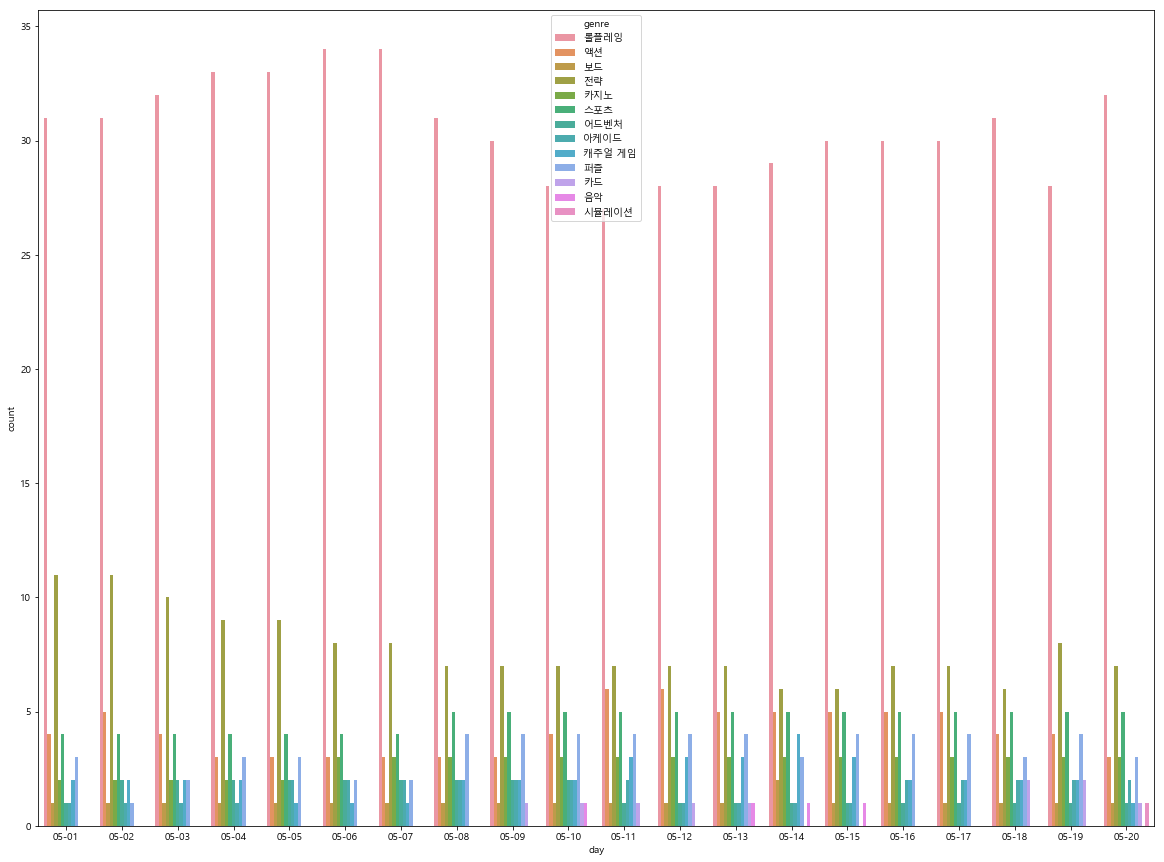

In [81]:
plt.figure(figsize=(20,15))
sns.countplot(x='day',hue='genre',data=kr_google_profit)
plt.show()
# 롤플레잉 압도적

In [57]:
kr_google_profit.to_csv('kr_google_profit.csv',index=False)
kr_google_popular.to_csv('kr_google_popular.csv',index=False)
kr_google_charge.to_csv('kr_google_charge.csv',index=False)

### 장르별 묶기

In [ ]:
# 롤플레잉 / 액션 / 스포츠 / 전략,시뮬 / 아케이드 / 캐주얼 / 보드,퍼즐 
# / 카드,카지노,포커 / 교육,단어,퀴즈 / 자동차경주(레이싱/러닝) / 음악

#### 그 전에 먼저 us 크롤링결과 중 누락값 정리

In [4]:
us_google_profit = pd.read_csv('us_google_profit.csv')
us_google_charge = pd.read_csv('us_google_charge.csv')

In [31]:
# 먼저 크롤링한 것 중 장르가 안 찾아져서 Search(주로 웹페이지가 뜨는 데 걸리는 시간상의 이유)가 뜬 genre들을 다시 정리
# 같은 게임에 장르가 찾아진 것도 있고 못 찾아진 것(Search. '약 ')도 있는데 찾아진 애들의 genre 그대로 갖다붙이기
# => us_google_profit / us_google_charge의 장르들 정리하고 genre_re라는 새로운 컬럼을 만듦

genre_re = []
for i in range(len(us_google_profit)):
    if us_google_profit.genre[i] == 'Search':
        name = us_google_profit.name[i]
        df = us_google_profit.loc[us_google_profit.name == name,:]
        genre_list = list(set(df.genre))
        genre_list.remove('Search')
        if '약 ' in genre_list:
            genre_list.remove('약 ')
        gen_want = genre_list[0]
        genre_re.append(gen_want)
    else:
        if us_google_profit.genre[i] == '약 ':
            name = us_google_profit.name[i]
            df = us_google_profit.loc[us_google_profit.name == name,:]
            genre_list = list(set(df.genre))
            genre_list.remove('약 ')
            if 'Search' in genre_list:
                genre_list.remove('Search')
            gen_want = genre_list[0]
            genre_re.append(gen_want)
        else:
            genre_re.append(us_google_profit.genre[i])
            pass
            
us_google_profit['genre_re'] = genre_re

In [33]:
us_google_profit

,date,rank,name,company,genre,genre_re
0,2019-05-01,1,캔디크러쉬사가,King,Search,캐주얼 게임
1,2019-05-01,2,Coin Master,Moon Active,캐주얼 게임,캐주얼 게임
2,2019-05-01,3,Empires & Puzzles: RPG Quest,Small Giant Games,롤플레잉,롤플레잉
3,2019-05-01,4,꿈의 집 (Homescapes),Playrix,캐주얼 게임,캐주얼 게임
4,2019-05-01,5,클래시 오브 클랜,Supercell,전략,전략
5,2019-05-01,6,총기시대 (Guns of Glory),Century Game (DIANDIAN INTERACTIVE),전략,전략
6,2019-05-01,7,Toon Blast,Peak,퍼즐,퍼즐
7,2019-05-01,8,에픽세븐,Smilegate Megaport,롤플레잉,롤플레잉
8,2019-05-01,9,PUBG MOBILE,Tencent Games,액션,액션
9,2019-05-01,10,Fate/Grand Order (English),Aniplex Inc.,롤플레잉,롤플레잉


In [42]:
genre_re = []
for i in range(len(us_google_charge)):
    if us_google_charge.genre[i] == 'Search':
        try:
            name = us_google_charge.name[i]
            df = us_google_charge.loc[us_google_charge.name == name,:]
            genre_list = list(set(df.genre))
            genre_list.remove('Search')
            if '약 ' in genre_list:
                genre_list.remove('약 ')
            gen_want = genre_list[0]
            genre_re.append(gen_want)
        except:
            if name == 'Stardew Valley':
                genre_re.append('시뮬레이션')
            elif name == 'Shards of Infinity':
                genre_re.append('보드')
    else:
        if us_google_charge.genre[i] == '약 ':
            name = us_google_charge.name[i]
            df = us_google_charge.loc[us_google_charge.name == name,:]
            genre_list = list(set(df.genre))
            genre_list.remove('약 ')
            if 'Search' in genre_list:
                genre_list.remove('Search')
            gen_want = genre_list[0]
            genre_re.append(gen_want)
        else:
            genre_re.append(us_google_charge.genre[i])
            pass
            
us_google_charge['genre_re'] = genre_re
us_google_charge

,date,rank,name,company,genre,genre_re
0,2019-05-01,1,Minecraft,Mojang,아케이드,아케이드
1,2019-05-01,2,Stardew Valley,Chucklefish Limited,Search,시뮬레이션
2,2019-05-01,3,Bloons TD 6,ninja kiwi,전략,전략
3,2019-05-01,4,Geometry Dash,RobTop Games,아케이드,아케이드
4,2019-05-01,5,에버테일,ZigZaGame Inc.,롤플레잉,롤플레잉
5,2019-05-01,6,Grand Theft Auto: San Andreas,Rockstar Games,액션,액션
6,2019-05-01,7,Pirates Outlaws,Fabled Game,카드,카드
7,2019-05-01,8,Terraria.,505 Games Srl,어드벤처,어드벤처
8,2019-05-01,9,Poly Bridge,Dry Cactus Limited,시뮬레이션,시뮬레이션
9,2019-05-01,10,The Game of Life,Marmalade Game Studio,보드,보드


In [43]:
us_google_profit.to_csv('us_google_profit.csv',index=False)
us_google_charge.to_csv('us_google_charge.csv',index=False)

#### 장르별 묶기 (by ppdb의 장르)

In [55]:
# kr용

def kr_genre_ppdb(file):
    genre2 = []
    for g in file.genre:
        if g == '롤플레잉':
            genre2.append('롤플레잉')
        elif g == '액션':
            genre2.append('액션')
        elif g == '스포츠':
            genre2.append('스포츠')
        elif g == '아케이드':
            genre2.append('아케이드')
        elif g == '어드벤처':
            genre2.append('어드벤처')
        elif g == '캐주얼 게임':
            genre2.append('캐주얼 게임')
        elif g == '자동차 경주':
            genre2.append('레이싱/러닝')
        elif g in ['전략','시뮬레이션']:
            genre2.append('전략/시뮬레이션')
        elif g in ['보드','퍼즐']:
            genre2.append('보드/퍼즐')
        elif g in ['카드','카지노','포커']:
            genre2.append('카드/포커/카지노')
        elif g in ['교육','단어','퀴즈']:
            genre2.append('교육/단어/퀴즈')
        elif g  == '음악':
            genre2.append('음악')
    
    print(len(genre2))
    file['genre_ppdb'] = genre2
    return file

In [54]:
# us용

def us_genre_ppdb(file):
    genre2 = []
    for g in file.genre_re:
        if g == '롤플레잉':
            genre2.append('롤플레잉')
        elif g == '액션':
            genre2.append('액션')
        elif g == '스포츠':
            genre2.append('스포츠')
        elif g == '아케이드':
            genre2.append('아케이드')
        elif g == '어드벤처':
            genre2.append('어드벤처')
        elif g == '캐주얼 게임':
            genre2.append('캐주얼 게임')
        elif g == '자동차 경주':
            genre2.append('레이싱/러닝')
        elif g in ['전략','시뮬레이션']:
            genre2.append('전략/시뮬레이션')
        elif g in ['보드','퍼즐']:
            genre2.append('보드/퍼즐')
        elif g in ['카드','카지노','포커']:
            genre2.append('카드/포커/카지노')
        elif g in ['교육','단어','퀴즈']:
            genre2.append('교육/단어/퀴즈')
        elif g  == '음악':
            genre2.append('음악')
    
    print(len(genre2))
    file['genre_ppdb'] = genre2
    return file

In [50]:
kr_google_profit = pd.read_csv('kr_google_profit.csv')
kr_google_charge = pd.read_csv('kr_google_charge.csv')
kr_google_popular = pd.read_csv('kr_google_popular.csv')

In [56]:
us_genre_ppdb(us_google_profit)
us_genre_ppdb(us_google_charge)
kr_genre_ppdb(kr_google_profit)
kr_genre_ppdb(kr_google_charge)
kr_genre_ppdb(kr_google_popular)

1200
1200
1200
1200
1200


,date,rank,name,company,genre,day,genre2,genre_ppdb
0,2019-05-01,1,프렌즈타운,Kakao Games Corp.,퍼즐,05-01,퀴즈/퍼즐,보드/퍼즐
1,2019-05-01,2,Crowd City,VOODOO,아케이드,05-01,아케이드,아케이드
2,2019-05-01,3,스택 볼 - 플랫폼을 다 뚫어버리세요,AI GAMES FZ,아케이드,05-01,아케이드,아케이드
3,2019-05-01,4,Traffic Run!,"Geisha Tokyo, Inc.",액션,05-01,액션,액션
4,2019-05-01,5,강림 : 망령인도자,Trigirls Studio,롤플레잉,05-01,롤플레잉,롤플레잉
5,2019-05-01,6,브롤스타즈,Supercell,액션,05-01,액션,액션
6,2019-05-01,7,콘트라: 리턴즈,Kakao Games Corp.,액션,05-01,액션,액션
7,2019-05-01,8,Run Race 3D,Good Job Games,스포츠,05-01,스포츠,스포츠
8,2019-05-01,9,점과박자 (Dot n Beat)-손의 속도 테스트,Badsnowball Limited,음악,05-01,교육/단어/음악,음악
9,2019-05-01,10,킹 오브 파이터 올스타 체험판,Netmarble,액션,05-01,액션,액션
